# **Sentiment Analysis - Amazon food review data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Reviews.csv',nrows = 500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [ ]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [29]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
#Lowercasing
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
#stopwords Removal
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
#Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
#Lemmatization
df['Text']=df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


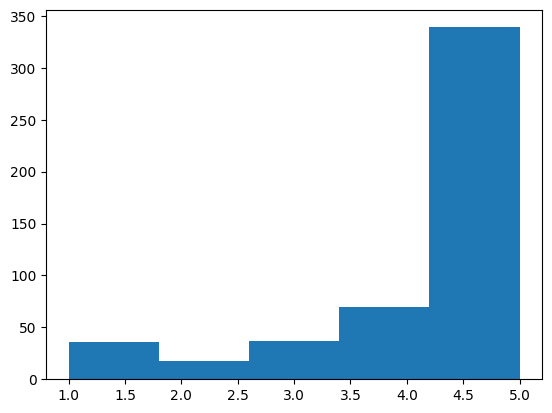

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [ ]:
review = df
review.dropna(inplace=True)
review.Score.hist(bins=5,grid=False)
plt.show()
print(review.groupby('Score').count().Id)

In [ ]:
score_1=review[review['Score']==1].sample(n=18)
score_2=review[review['Score']==2].sample(n=18)
score_3=review[review['Score']==3].sample(n=18)
score_4=review[review['Score']==4].sample(n=18)
score_5=review[review['Score']==5].sample(n=18)


In [ ]:
review_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
review_sample.reset_index(drop=True,inplace=True)
print(review_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


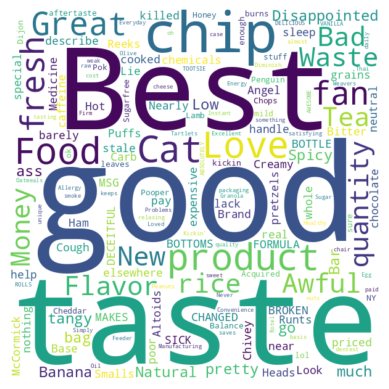

In [ ]:
from wordcloud import WordCloud

review_str = " ".join(review_sample['Summary'].to_numpy())

wordcloud = WordCloud(width=600,height=600,background_color='white').generate(review_str)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [22]:
negative_reviews = review_sample[review_sample['Score'].isin([1,2])]
positive_reviews = review_sample[review_sample['Score'].isin([4,5])]
neutral_reviews = review_sample[review_sample['Score'].isin([3])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()
neutral_reviews_str = neutral_reviews.Summary.str.cat()

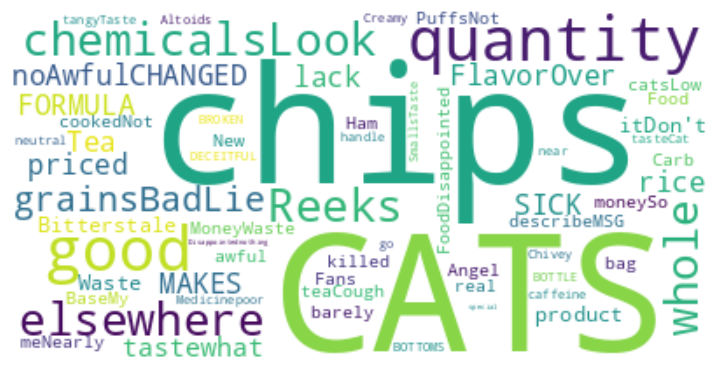

In [31]:
wordcloud_neg = WordCloud(background_color='white').generate(negative_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_neg,interpolation='bilinear')
ax1.axis('off')
plt.show()

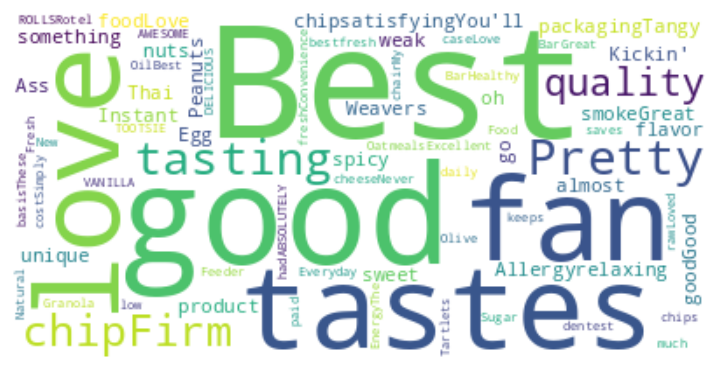

In [32]:
wordcloud_pos = WordCloud(background_color='white').generate(positive_reviews_str)
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_pos,interpolation='bilinear')
ax2.axis('off')
plt.show()

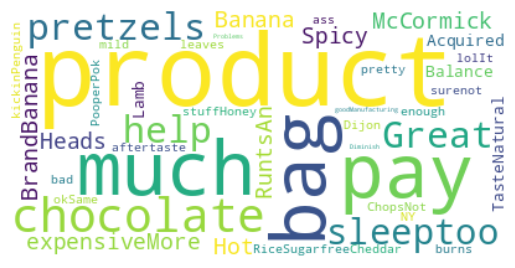

In [33]:
wordcloud_neu = WordCloud(background_color='white').generate(neutral_reviews_str)
plt.imshow(wordcloud_neu,interpolation='bilinear')
plt.axis('off')
plt.show()

# VADER sentiment Anal

In [34]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [38]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()

empty_line = []
for row in df['Text']:
  vs = analyzer.polarity_scores(row)
  empty_line.append(vs)


df_vader = pd.DataFrame(empty_line)
df_vader.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [40]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_vader)

https://docs.google.com/spreadsheets/d/1aXgMXyn3yT6ai4SfD3ptYYCIaJF4snBDPH1hIhZ89mE#gid=0
